In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import seaborn as sns

import itertools

In [2]:
df = pd.read_csv("text_complexity_lexica_corpus.csv")
y = np.array(df["#label"])
X = df.drop(["#id", "#label", "Unnamed: 0"],  axis='columns')

In [3]:
df.head()

,Unnamed: 0,#label,#id,sentence_length,characters_per_word,syllables_per_word,text_length,noun_phrases_per_sent,tree_height,sub_clauses_per_sent,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
0,0,0.0,miniklexi_0,7.285714,4.862745,1.627451,102,2.214286,3.857143,0.071429,...,1,0,0,0,0,0,0,0,3,0
1,1,0.0,miniklexi_1,8.090909,4.494382,1.539326,89,2.454545,4.363636,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,miniklexi_2,7.187500,4.521739,1.634783,115,2.750000,3.500000,0.312500,...,0,0,0,0,0,0,0,0,1,0
3,3,0.0,miniklexi_3,7.200000,5.000000,1.743056,144,2.000000,3.850000,0.150000,...,2,0,0,0,0,0,0,0,1,0
4,4,0.0,miniklexi_4,6.235294,5.132075,1.877358,106,2.176471,3.470588,0.117647,...,0,0,0,0,0,0,0,0,1,0


In [4]:
miniklexi_data = df.loc[df["#label"] == 0.0].drop(["#id", "#label"],  axis='columns')
klexikon_data = df.loc[df["#label"] == 0.5].drop(["#id", "#label"],  axis='columns')
wiki_data = df.loc[df["#label"] == 1.0].drop(["#id", "#label"],  axis='columns')

# Baseline Features

In [5]:
baseline_df = df[["#label", "sentence_length", "characters_per_word", "syllables_per_word", "text_length"]]
baseline_miniklexi = baseline_df.loc[df["#label"] == 0.0]
baseline_klexikon = baseline_df.loc[df["#label"] == 0.5]
baseline_wiki = baseline_df.loc[df["#label"] == 1.0]

In [6]:
baseline_df

,#label,sentence_length,characters_per_word,syllables_per_word,text_length
0,0.0,7.285714,4.862745,1.627451,102
1,0.0,8.090909,4.494382,1.539326,89
2,0.0,7.187500,4.521739,1.634783,115
3,0.0,7.200000,5.000000,1.743056,144
4,0.0,6.235294,5.132075,1.877358,106
...,...,...,...,...,...
880,1.0,16.461538,6.448598,2.378505,214
881,1.0,15.400000,6.172078,2.126623,308
882,1.0,15.750000,5.904762,2.126984,63
883,1.0,15.750000,6.688889,2.485714,315


array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'sentence_length'}>],
       [<AxesSubplot:title={'center':'characters_per_word'}>,
        <AxesSubplot:title={'center':'syllables_per_word'}>],
       [<AxesSubplot:title={'center':'text_length'}>, <AxesSubplot:>]],
      dtype=object)

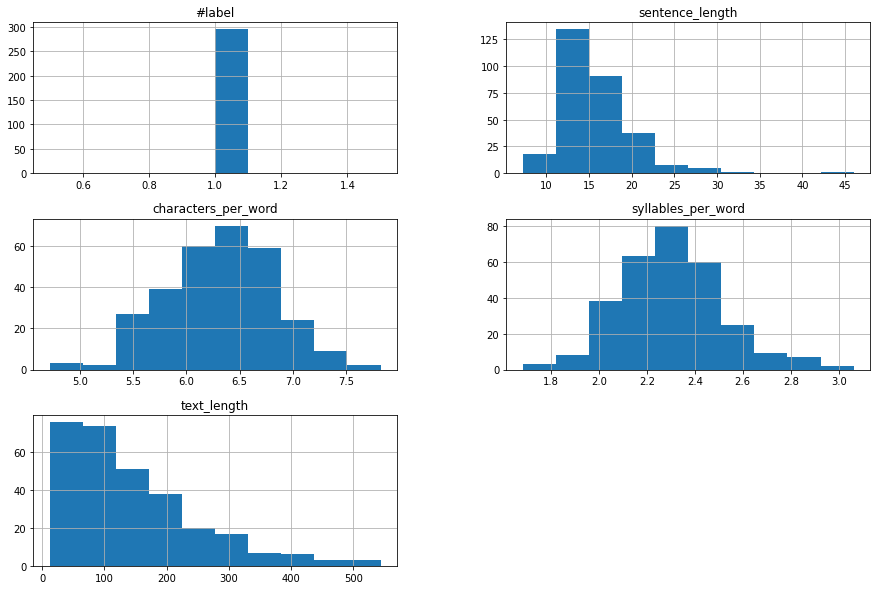

In [7]:
baseline_wiki.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'sentence_length'}>],
       [<AxesSubplot:title={'center':'characters_per_word'}>,
        <AxesSubplot:title={'center':'syllables_per_word'}>],
       [<AxesSubplot:title={'center':'text_length'}>, <AxesSubplot:>]],
      dtype=object)

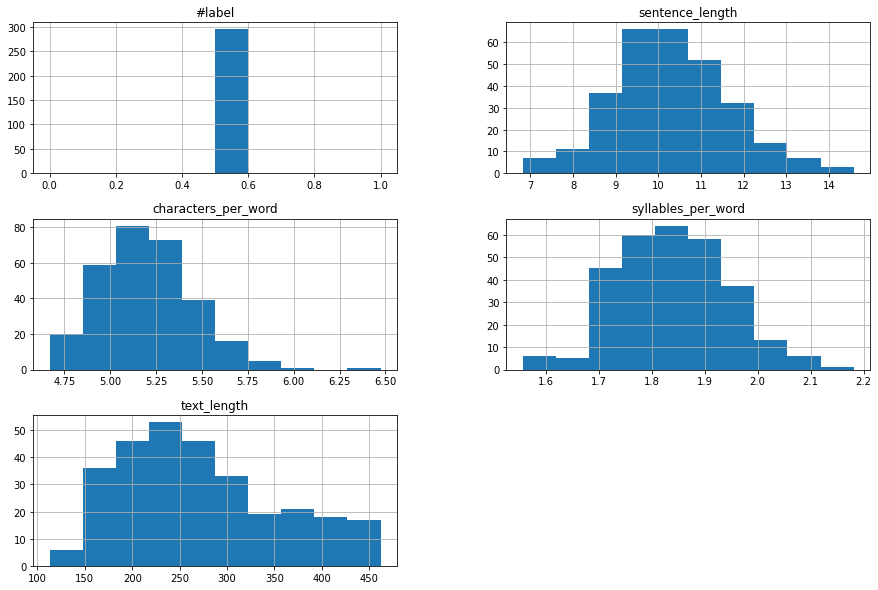

In [8]:
baseline_klexikon.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'sentence_length'}>],
       [<AxesSubplot:title={'center':'characters_per_word'}>,
        <AxesSubplot:title={'center':'syllables_per_word'}>],
       [<AxesSubplot:title={'center':'text_length'}>, <AxesSubplot:>]],
      dtype=object)

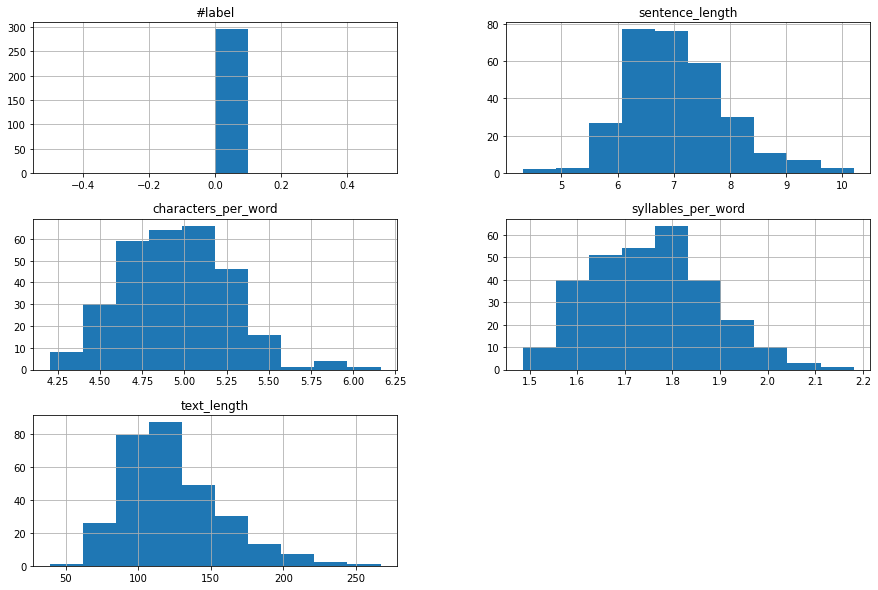

In [9]:
baseline_miniklexi.hist(figsize=(15,10))

<AxesSubplot:xlabel='syllables_per_word', ylabel='Count'>

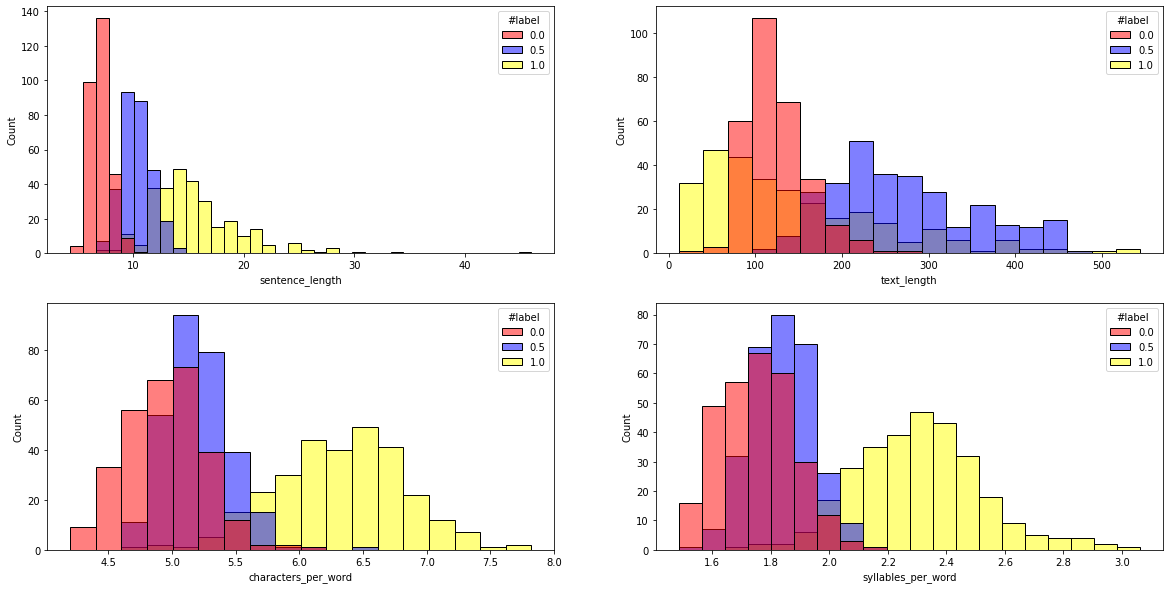

In [10]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20, 10))
sns.histplot(ax=axes[0, 0], data=baseline_df, x="sentence_length", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=baseline_df, x="text_length", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=baseline_df, x="characters_per_word", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=baseline_df, x="syllables_per_word", hue="#label", palette=["red", "blue", "yellow"])

# Syntactic Features

In [11]:
syntactic_df = df[["#label", "noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]]
syntactic_miniklexi = syntactic_df.loc[df["#label"] == 0.0]
syntactic_klexikon = syntactic_df.loc[df["#label"] == 0.5]
syntactic_wiki = syntactic_df.loc[df["#label"] == 1.0]


<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

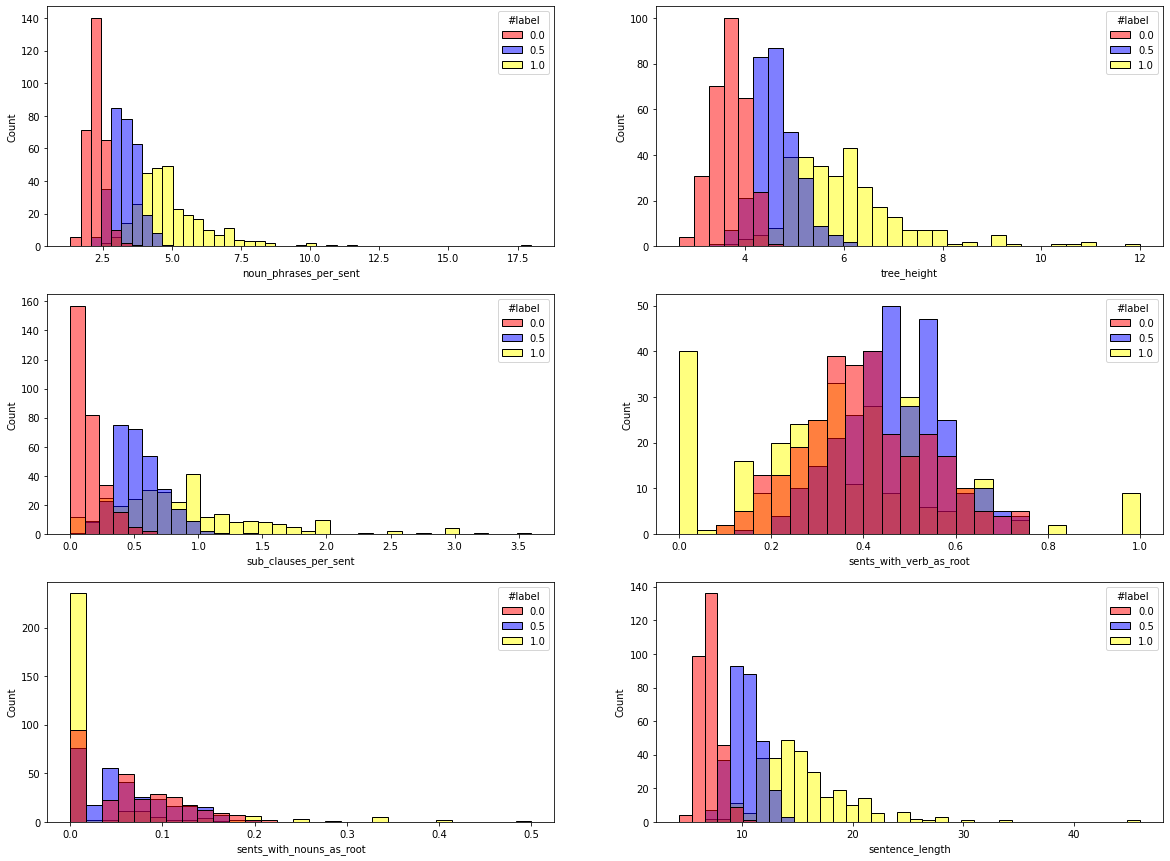

In [12]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(20, 15))
sns.histplot(ax=axes[0, 0], data=syntactic_df, x="noun_phrases_per_sent", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=syntactic_df, x="tree_height", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=syntactic_df, x="sub_clauses_per_sent", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=syntactic_df, x="sents_with_verb_as_root", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=syntactic_df, x="sents_with_nouns_as_root", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=syntactic_df, x="sentence_length", hue="#label", palette=["red", "blue", "yellow"])

# POS tag Features

In [13]:
pos_df = df[["#label", "POS_verbs", "POS_aux_verbs", "POS_nouns", "POS_adjectives", "POS_punctuations", "POS_determiners"
            , "POS_pronouns", "POS_conjunctions", "POS_numerales", "POS_adpositions"]]
pos_miniklexi = pos_df.loc[df["#label"] == 0.0]
pos_klexikon = pos_df.loc[df["#label"] == 0.5]
pos_wiki = pos_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='POS_adpositions', ylabel='Count'>

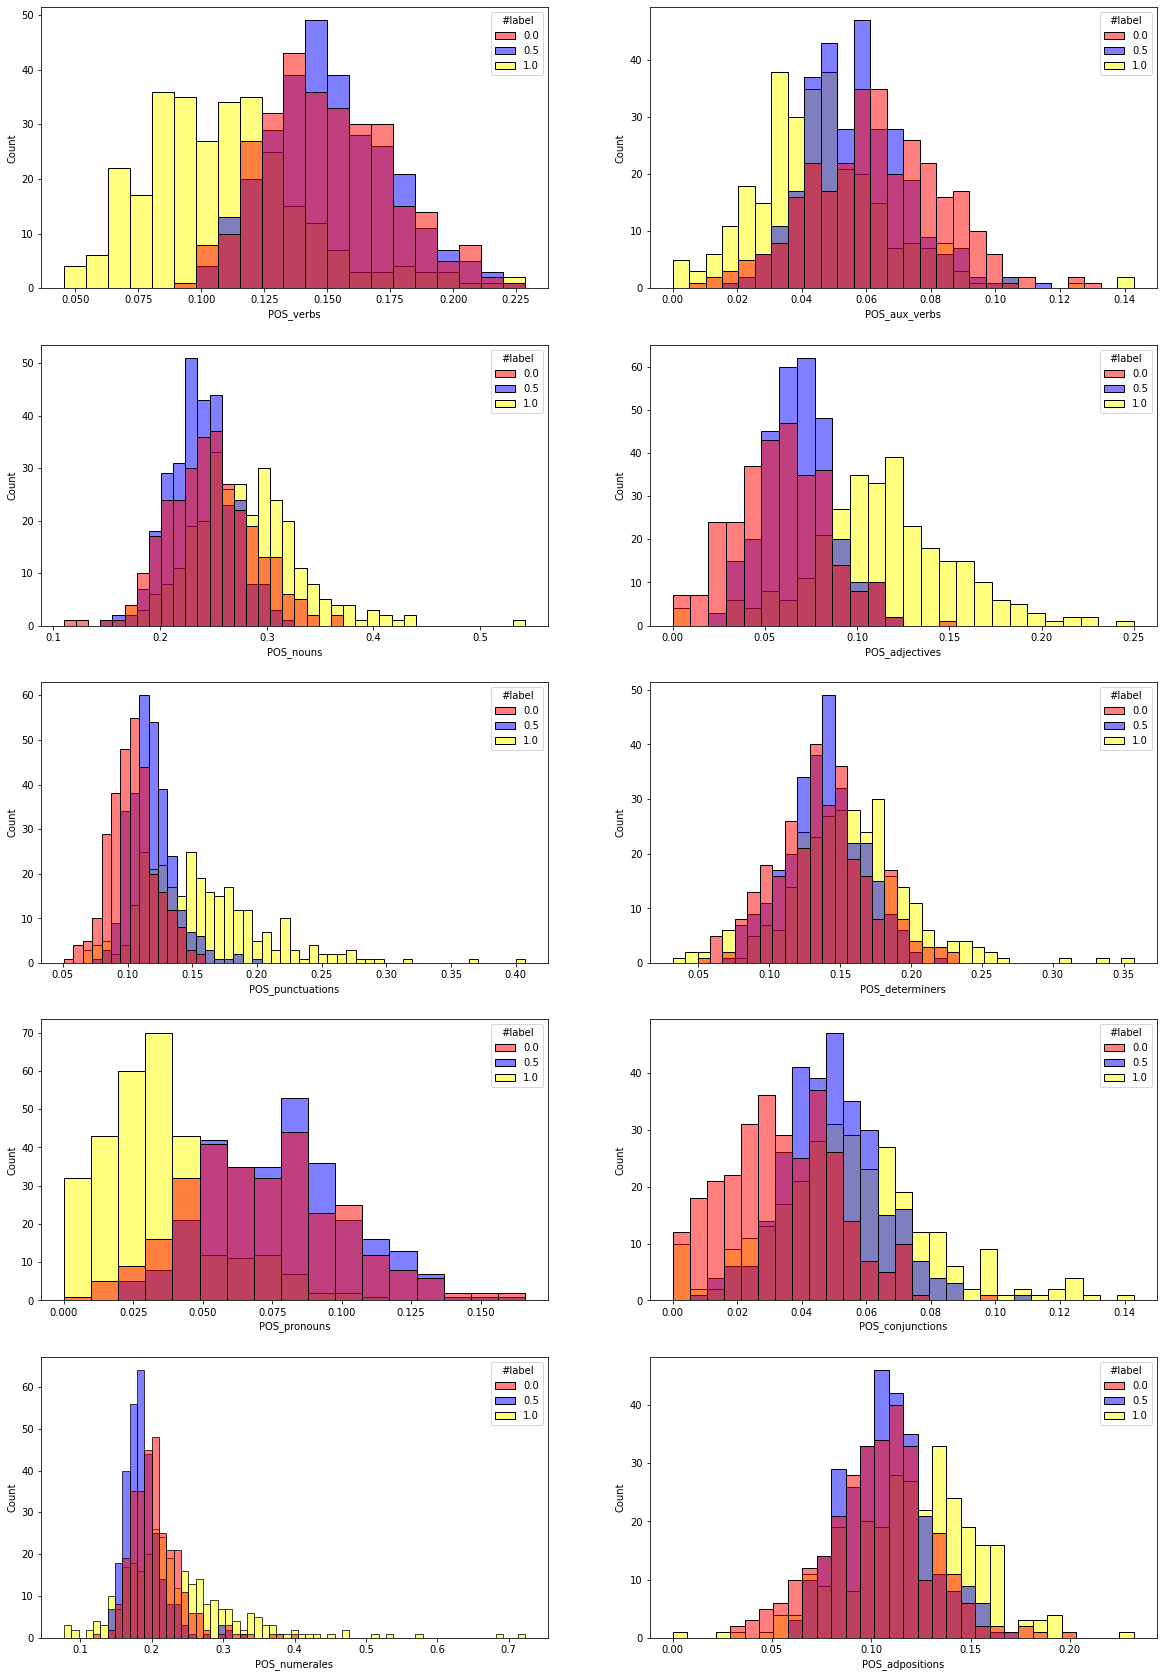

In [14]:
fig, axes = plt.subplots(nrows=5, ncols = 2, figsize=(20, 30))
sns.histplot(ax=axes[0, 0], data=pos_df, x="POS_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=pos_df, x="POS_aux_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=pos_df, x="POS_nouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=pos_df, x="POS_adjectives", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=pos_df, x="POS_punctuations", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=pos_df, x="POS_determiners", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[3, 0], data=pos_df, x="POS_pronouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[3, 1], data=pos_df, x="POS_conjunctions", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[4, 0], data=pos_df, x="POS_numerales", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[4, 1], data=pos_df, x="POS_adpositions", hue="#label", palette=["red", "blue", "yellow"])

### Most Interessting Distributions (POS)

<AxesSubplot:xlabel='POS_conjunctions', ylabel='Count'>

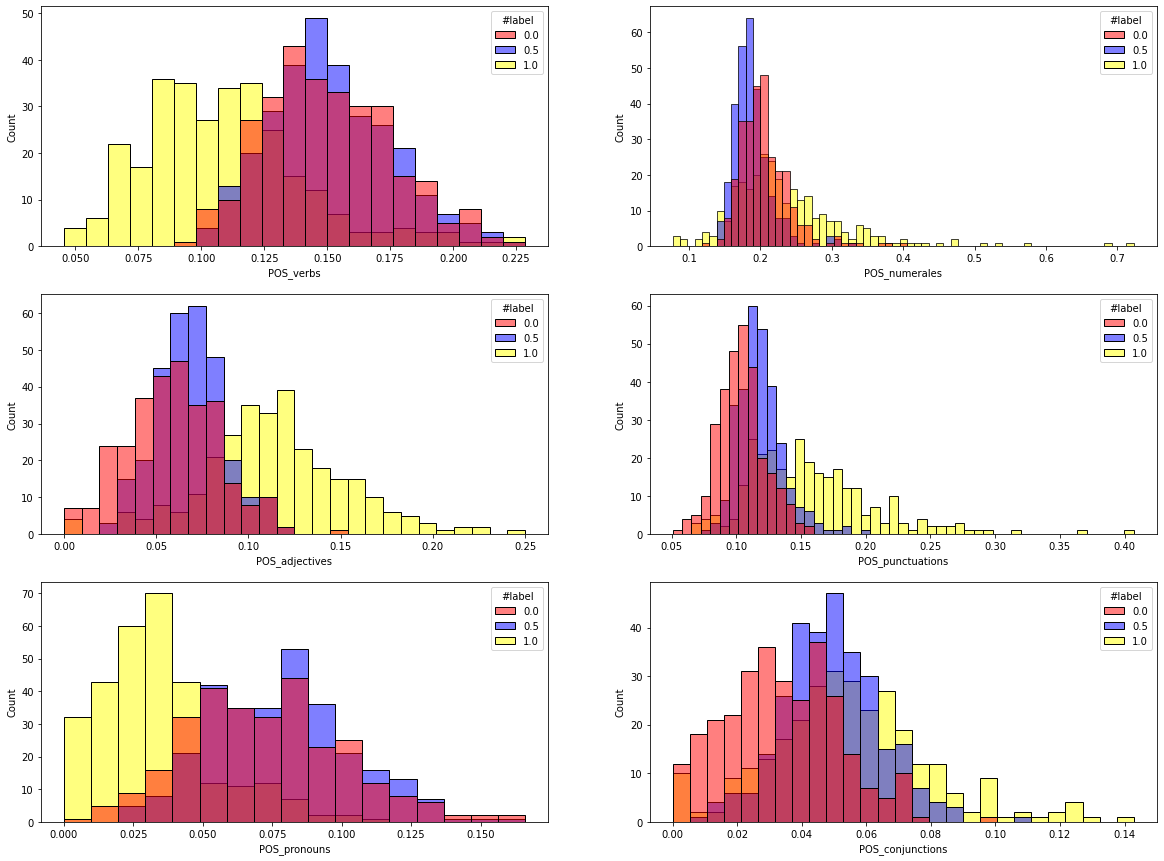

In [15]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(20, 15))
sns.histplot(ax=axes[0, 0], data=pos_df, x="POS_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=pos_df, x="POS_numerales", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=pos_df, x="POS_adjectives", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=pos_df, x="POS_punctuations", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=pos_df, x="POS_pronouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=pos_df, x="POS_conjunctions", hue="#label", palette=["red", "blue", "yellow"])

# Lexical Features

In [16]:
lexical_df = df[["#label", "ttr", "lexical_complexity_score"]]
pos_miniklexi = lexical_df.loc[df["#label"] == 0.0]
pos_klexikon = lexical_df.loc[df["#label"] == 0.5]
pos_wiki = lexical_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='lexical_complexity_score', ylabel='Count'>

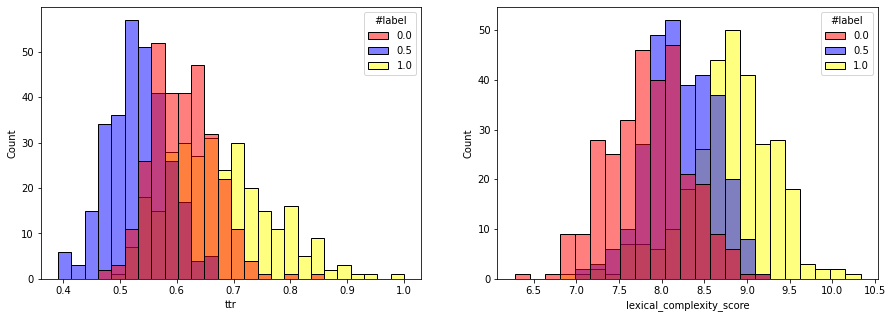

In [17]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(15, 5))
sns.histplot(ax=axes[0], data=lexical_df, x="ttr", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=lexical_df, x="lexical_complexity_score", hue="#label", palette=["red", "blue", "yellow"])

# Verb Tense

In [18]:
tense_df = df[["#label", "verbs_in_sentence"]]
pos_miniklexi = tense_df.loc[df["#label"] == 0.0]
pos_klexikon = tense_df.loc[df["#label"] == 0.5]
pos_wiki = tense_df.loc[df["#label"] == 1.0]

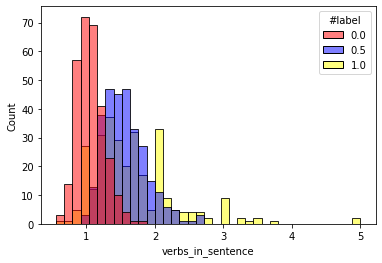

In [19]:
x = sns.histplot(data=tense_df, x="verbs_in_sentence", hue="#label", palette=["red", "blue", "yellow"])

# Discourse Features

In [20]:
discourse_df = df[["#label", "pronouns_per_sentence", "articles_per_sentence"]]
pos_miniklexi = discourse_df.loc[df["#label"] == 0.0]
pos_klexikon = discourse_df.loc[df["#label"] == 0.5]
pos_wiki = discourse_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='articles_per_sentence', ylabel='Count'>

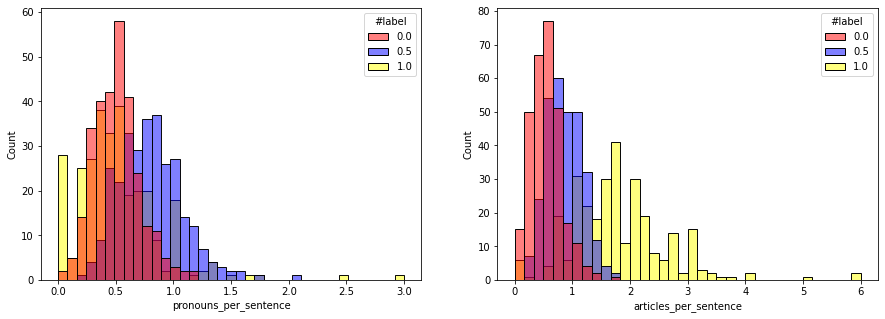

In [21]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(15, 5))
sns.histplot(ax=axes[0], data=discourse_df, x="pronouns_per_sentence", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=discourse_df, x="articles_per_sentence", hue="#label", palette=["red", "blue", "yellow"])

# Semantic Similarity Features

In [22]:
sem_sim_df = df[["#label", "semantic_similarity_nouns", "semantic_similarity_verbs", "semantic_similarity_adjectives"]]
pos_miniklexi = sem_sim_df.loc[df["#label"] == 0.0]
pos_klexikon = sem_sim_df.loc[df["#label"] == 0.5]
pos_wiki = sem_sim_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='semantic_similarity_adjectives', ylabel='Count'>

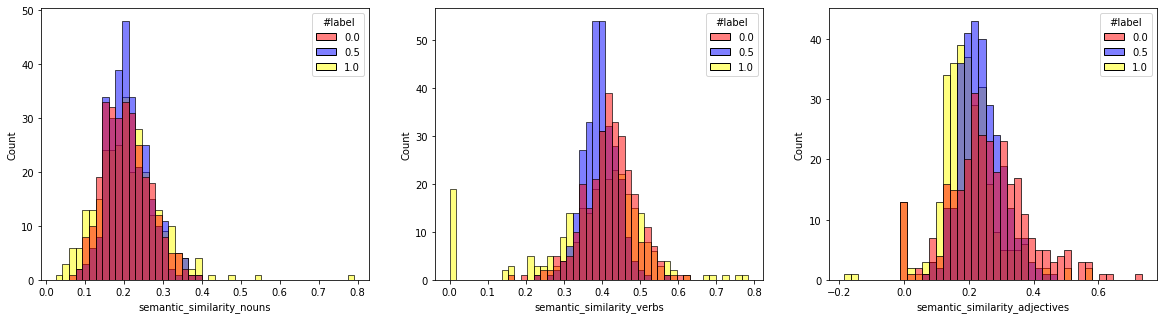

In [23]:
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize=(20, 5))
sns.histplot(ax=axes[0], data=sem_sim_df, x="semantic_similarity_nouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=sem_sim_df, x="semantic_similarity_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2], data=sem_sim_df, x="semantic_similarity_adjectives", hue="#label", palette=["red", "blue", "yellow"])

In [24]:
sem_sim_df.describe()

,#label,semantic_similarity_nouns,semantic_similarity_verbs,semantic_similarity_adjectives
count,885.000000,885.000000,885.000000,885.000000
mean,0.500000,0.209073,0.399926,0.228938
std,0.408479,0.066871,0.092901,0.100795
min,0.000000,0.025492,0.000000,-0.187130
25%,0.000000,0.163882,0.365804,0.174364
50%,0.500000,0.204456,0.405177,0.221073
75%,1.000000,0.246890,0.447732,0.280196
max,1.000000,0.790869,0.784351,0.734285


In [25]:
pos_miniklexi.describe()

,#label,semantic_similarity_nouns,semantic_similarity_verbs,semantic_similarity_adjectives
count,295.0,295.000000,295.000000,295.000000
mean,0.0,0.206357,0.420181,0.259301
std,0.0,0.059254,0.067795,0.123860
min,0.0,0.072949,0.158548,0.000000
25%,0.0,0.162011,0.382243,0.185775
50%,0.0,0.203003,0.423328,0.249822
75%,0.0,0.244572,0.462402,0.331154
max,0.0,0.382682,0.622035,0.734285


In [26]:
pos_klexikon.describe()

,#label,semantic_similarity_nouns,semantic_similarity_verbs,semantic_similarity_adjectives
count,295.0,295.000000,295.000000,295.000000
mean,0.5,0.210205,0.395026,0.235829
std,0.0,0.052757,0.043887,0.066262
min,0.5,0.084625,0.231103,0.074503
25%,0.5,0.172661,0.369339,0.190054
50%,0.5,0.205960,0.394616,0.227901
75%,0.5,0.242101,0.422950,0.276063
max,0.5,0.384926,0.569521,0.464520


In [27]:
pos_wiki.describe()

,#label,semantic_similarity_nouns,semantic_similarity_verbs,semantic_similarity_adjectives
count,295.0,295.000000,295.000000,295.000000
mean,1.0,0.210657,0.384571,0.191683
std,0.0,0.084499,0.136952,0.091930
min,1.0,0.025492,0.000000,-0.187130
25%,1.0,0.155943,0.339382,0.143917
50%,1.0,0.203875,0.405047,0.187766
75%,1.0,0.253785,0.462890,0.235225
max,1.0,0.790869,0.784351,0.569264


# Inter-Feature Relations

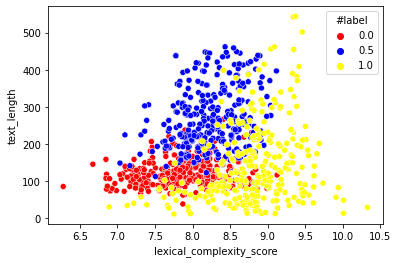

In [28]:
a = sns.scatterplot(data=df, hue="#label", x="lexical_complexity_score", y="text_length", palette=["red", "blue", "yellow"])

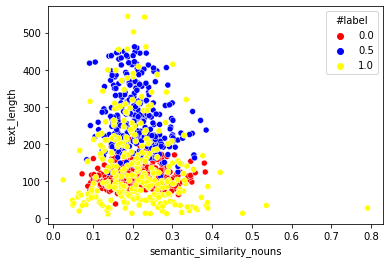

In [29]:
b = sns.scatterplot(data=df, hue="#label", x="semantic_similarity_nouns", y="text_length", palette=["red", "blue", "yellow"])

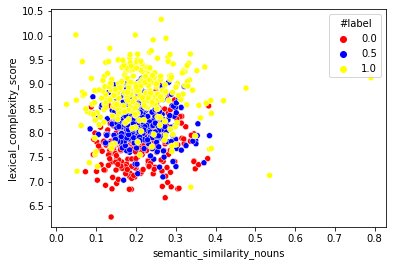

In [30]:
c = sns.scatterplot(data=df, hue="#label", x="semantic_similarity_nouns", y="lexical_complexity_score", palette=["red", "blue", "yellow"])

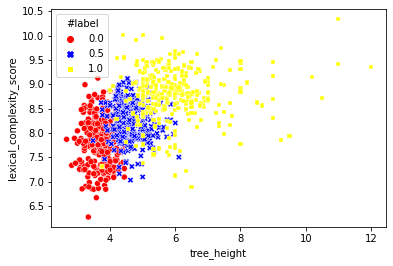

In [31]:
d = sns.scatterplot(data=df, hue="#label", x="tree_height", y="lexical_complexity_score",  
                    palette=["red", "blue", "yellow"], 
                    style="#label")

# Analyse der Daten zu Diskursmarkerbedeutungen

In [32]:
dms_df = df[['#label',
 'Contingency.Cause.Reason',
 'Expansion.Substitution.Arg2-as-subst',
 'Contingency.Cause.Result',
 'Contingency.Purpose.Arg1-as-goal',
 'Expansion.Conjunction',
 'Temporal.Asynchronous.Succession',
 'Comparison.Contrast',
 'Temporal.Asynchronous.Precedence',
 'Expansion.Exception.Arg2-as-except',
 'Comparison.Concession.Arg1-as-denier',
 'Contingency.Negative-condition.Arg2-as-negCond',
 'Expansion.Disjunction',
 'Expansion.Manner.Arg1-as-manner',
 'Contingency.Negative-condition.Arg1-as-negCond',
 'Comparison.Concession.Arg2-as-denier',
 'Temporal.Synchronous',
 'Contingency.Purpose.Arg2-as-goal',
 'Expansion.Exception.Arg1-as-except',
 'Expansion.Level-of-detail.Arg2-as-detail',
 'Expansion.Substitution.Arg1-as-subst',
 'Contingency.Condition.Arg1-as-cond',
 'Expansion.Instantiation.Arg2-as-instance',
 'Contingency.Condition.Arg2-as-cond',
 'Expansion.Equivalence',
 'Expansion.Manner.Arg2-as-manner']]

In [33]:
dms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   #label                                          885 non-null    float64
 1   Contingency.Cause.Reason                        885 non-null    int64  
 2   Expansion.Substitution.Arg2-as-subst            885 non-null    int64  
 3   Contingency.Cause.Result                        885 non-null    int64  
 4   Contingency.Purpose.Arg1-as-goal                885 non-null    int64  
 5   Expansion.Conjunction                           885 non-null    int64  
 6   Temporal.Asynchronous.Succession                885 non-null    int64  
 7   Comparison.Contrast                             885 non-null    int64  
 8   Temporal.Asynchronous.Precedence                885 non-null    int64  
 9   Expansion.Exception.Arg2-as-except         

In [34]:
dms_df.describe()

,#label,Contingency.Cause.Reason,Expansion.Substitution.Arg2-as-subst,Contingency.Cause.Result,Contingency.Purpose.Arg1-as-goal,Expansion.Conjunction,Temporal.Asynchronous.Succession,Comparison.Contrast,Temporal.Asynchronous.Precedence,Expansion.Exception.Arg2-as-except,...,Temporal.Synchronous,Contingency.Purpose.Arg2-as-goal,Expansion.Exception.Arg1-as-except,Expansion.Level-of-detail.Arg2-as-detail,Expansion.Substitution.Arg1-as-subst,Contingency.Condition.Arg1-as-cond,Expansion.Instantiation.Arg2-as-instance,Contingency.Condition.Arg2-as-cond,Expansion.Equivalence,Expansion.Manner.Arg2-as-manner
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.500000,0.986441,0.123164,1.025989,0.127684,7.011299,0.349153,1.663277,1.164972,0.028249,...,1.847458,1.160452,0.006780,0.028249,0.030508,0.001130,0.232768,0.384181,0.933333,0.030508
std,0.408479,1.284187,0.361581,1.280025,0.375391,5.254376,0.722232,1.911994,1.591804,0.178904,...,1.925774,1.634337,0.082106,0.178904,0.178532,0.033615,0.492075,0.853114,1.229845,0.196624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,2.000000,0.000000,10.000000,1.000000,3.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,9.000000,3.000000,8.000000,3.000000,43.000000,8.000000,10.000000,10.000000,2.000000,...,12.000000,14.000000,1.000000,2.000000,2.000000,1.000000,3.000000,7.000000,7.000000,2.000000


array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'Contingency.Cause.Reason'}>,
        <AxesSubplot:title={'center':'Expansion.Substitution.Arg2-as-subst'}>,
        <AxesSubplot:title={'center':'Contingency.Cause.Result'}>,
        <AxesSubplot:title={'center':'Contingency.Purpose.Arg1-as-goal'}>],
       [<AxesSubplot:title={'center':'Expansion.Conjunction'}>,
        <AxesSubplot:title={'center':'Temporal.Asynchronous.Succession'}>,
        <AxesSubplot:title={'center':'Comparison.Contrast'}>,
        <AxesSubplot:title={'center':'Temporal.Asynchronous.Precedence'}>,
        <AxesSubplot:title={'center':'Expansion.Exception.Arg2-as-except'}>],
       [<AxesSubplot:title={'center':'Comparison.Concession.Arg1-as-denier'}>,
        <AxesSubplot:title={'center':'Contingency.Negative-condition.Arg2-as-negCond'}>,
        <AxesSubplot:title={'center':'Expansion.Disjunction'}>,
        <AxesSubplot:title={'center':'Expansion.Manner.Arg1-as-manner'}>,
  

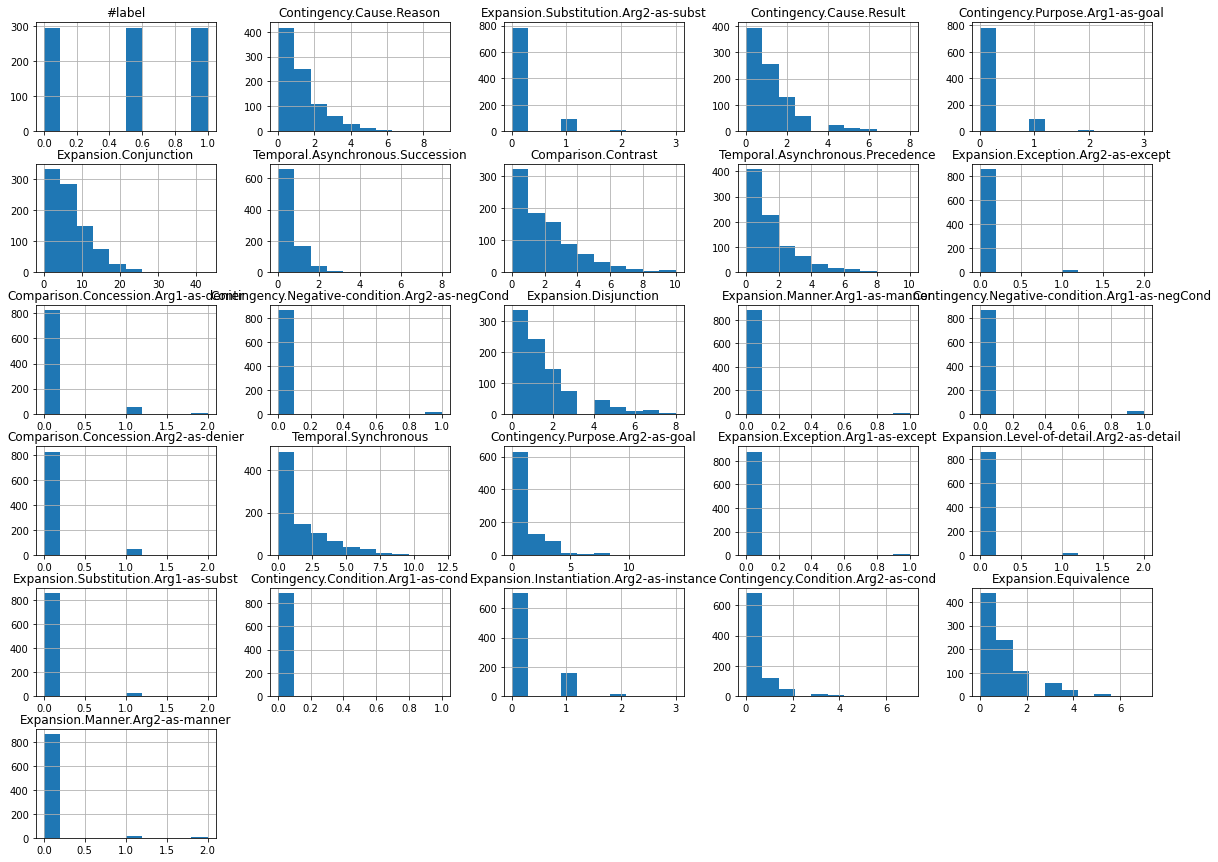

In [35]:
dms_df.hist(figsize=(20,15))

Auf den ersten Blick auf diese Daten scheinen einige Diskursemarkerbedeutungen (DMB) relativ selten vorzukommen. Ich möchte mir (erstmal) nur die anschauen, deren Häufigkeit im verwendeten Datensatz über einen gewissen Schwellenwert kommen. Ich entscheide mich (nach einigen Tests) dafür, die Schwelle auf 25 zu definieren, weil das kappe 1 % von der Anzahl der Texte, die im Korpus enthalten ist. Wenn die Diskursmarkerbedeutung in weniger als einem Prozent der Texte auftritt, soll sie aus der weiteren Betrachtung ausgeschlossen werden. Somit werden die hier betrachteten DMB von 26 auf 18 reduziert.
 

a) die so ausgefilterten DMB:

In [36]:
# filter out discourse marker senses with a count less than 26
filtered_out_dms_df = dms_df.loc[:, dms_df.sum(axis=0) < 26]
filtered_out_dms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Expansion.Exception.Arg2-as-except              885 non-null    int64
 1   Contingency.Negative-condition.Arg2-as-negCond  885 non-null    int64
 2   Expansion.Manner.Arg1-as-manner                 885 non-null    int64
 3   Contingency.Negative-condition.Arg1-as-negCond  885 non-null    int64
 4   Expansion.Exception.Arg1-as-except              885 non-null    int64
 5   Expansion.Level-of-detail.Arg2-as-detail        885 non-null    int64
 6   Contingency.Condition.Arg1-as-cond              885 non-null    int64
dtypes: int64(7)
memory usage: 48.5 KB


In [37]:
# filtered discourse marker senses with a count less than 10
filtered_dms_df = dms_df.loc[:, dms_df.sum(axis=0) > 25]

b) DMB die in mehr als einem Prozent der Texte vorkommen:

In [38]:
filtered_dms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   #label                                    885 non-null    float64
 1   Contingency.Cause.Reason                  885 non-null    int64  
 2   Expansion.Substitution.Arg2-as-subst      885 non-null    int64  
 3   Contingency.Cause.Result                  885 non-null    int64  
 4   Contingency.Purpose.Arg1-as-goal          885 non-null    int64  
 5   Expansion.Conjunction                     885 non-null    int64  
 6   Temporal.Asynchronous.Succession          885 non-null    int64  
 7   Comparison.Contrast                       885 non-null    int64  
 8   Temporal.Asynchronous.Precedence          885 non-null    int64  
 9   Comparison.Concession.Arg1-as-denier      885 non-null    int64  
 10  Expansion.Disjunction                 

array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'Contingency.Cause.Reason'}>,
        <AxesSubplot:title={'center':'Expansion.Substitution.Arg2-as-subst'}>,
        <AxesSubplot:title={'center':'Contingency.Cause.Result'}>],
       [<AxesSubplot:title={'center':'Contingency.Purpose.Arg1-as-goal'}>,
        <AxesSubplot:title={'center':'Expansion.Conjunction'}>,
        <AxesSubplot:title={'center':'Temporal.Asynchronous.Succession'}>,
        <AxesSubplot:title={'center':'Comparison.Contrast'}>],
       [<AxesSubplot:title={'center':'Temporal.Asynchronous.Precedence'}>,
        <AxesSubplot:title={'center':'Comparison.Concession.Arg1-as-denier'}>,
        <AxesSubplot:title={'center':'Expansion.Disjunction'}>,
        <AxesSubplot:title={'center':'Comparison.Concession.Arg2-as-denier'}>],
       [<AxesSubplot:title={'center':'Temporal.Synchronous'}>,
        <AxesSubplot:title={'center':'Contingency.Purpose.Arg2-as-goal'}>,
        <AxesSubplot:tit

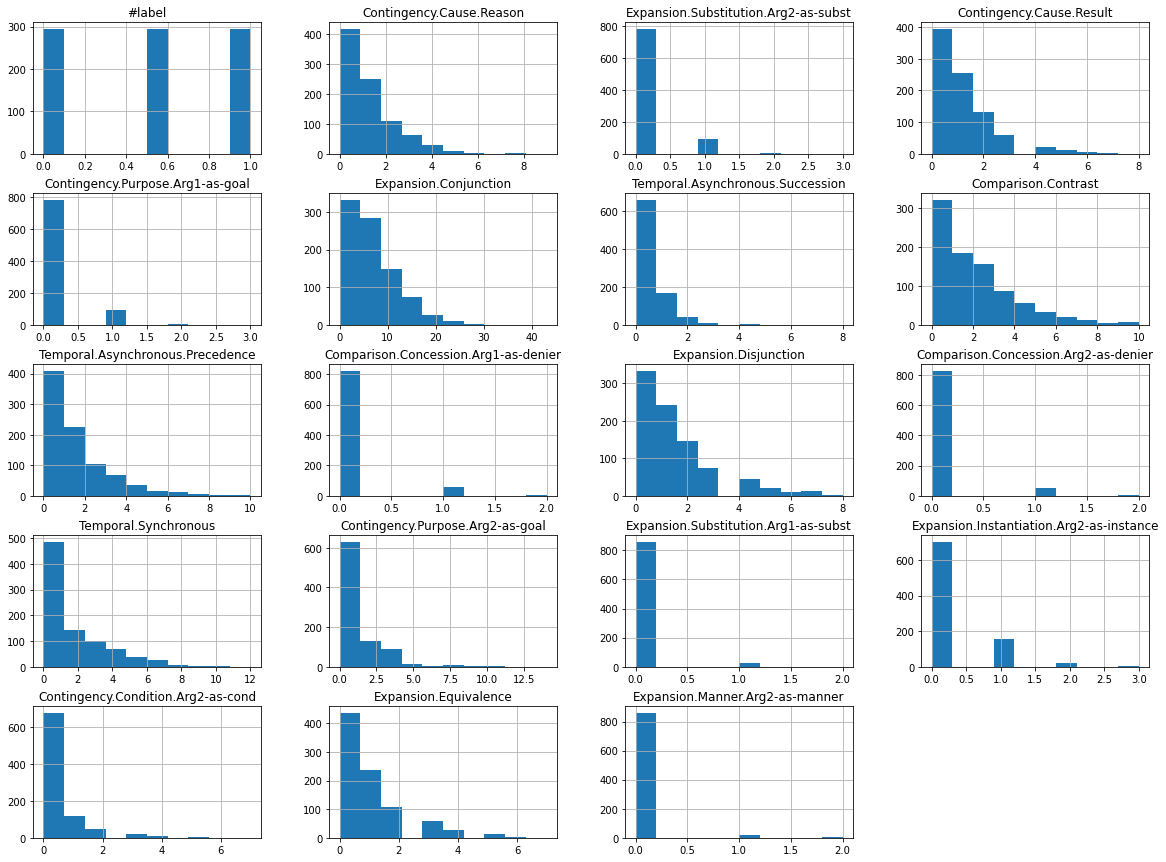

In [39]:
filtered_dms_df.hist(figsize=(20,15))

In [40]:
dms_miniklexi = filtered_dms_df.loc[filtered_dms_df["#label"] == 0.0]
dms_klexikon = filtered_dms_df.loc[filtered_dms_df["#label"] == 0.5]
dms_wiki = filtered_dms_df.loc[filtered_dms_df["#label"] == 1.0]

### Verteilung der Daten für die drei Label

<AxesSubplot:xlabel='Expansion.Manner.Arg2-as-manner', ylabel='count'>

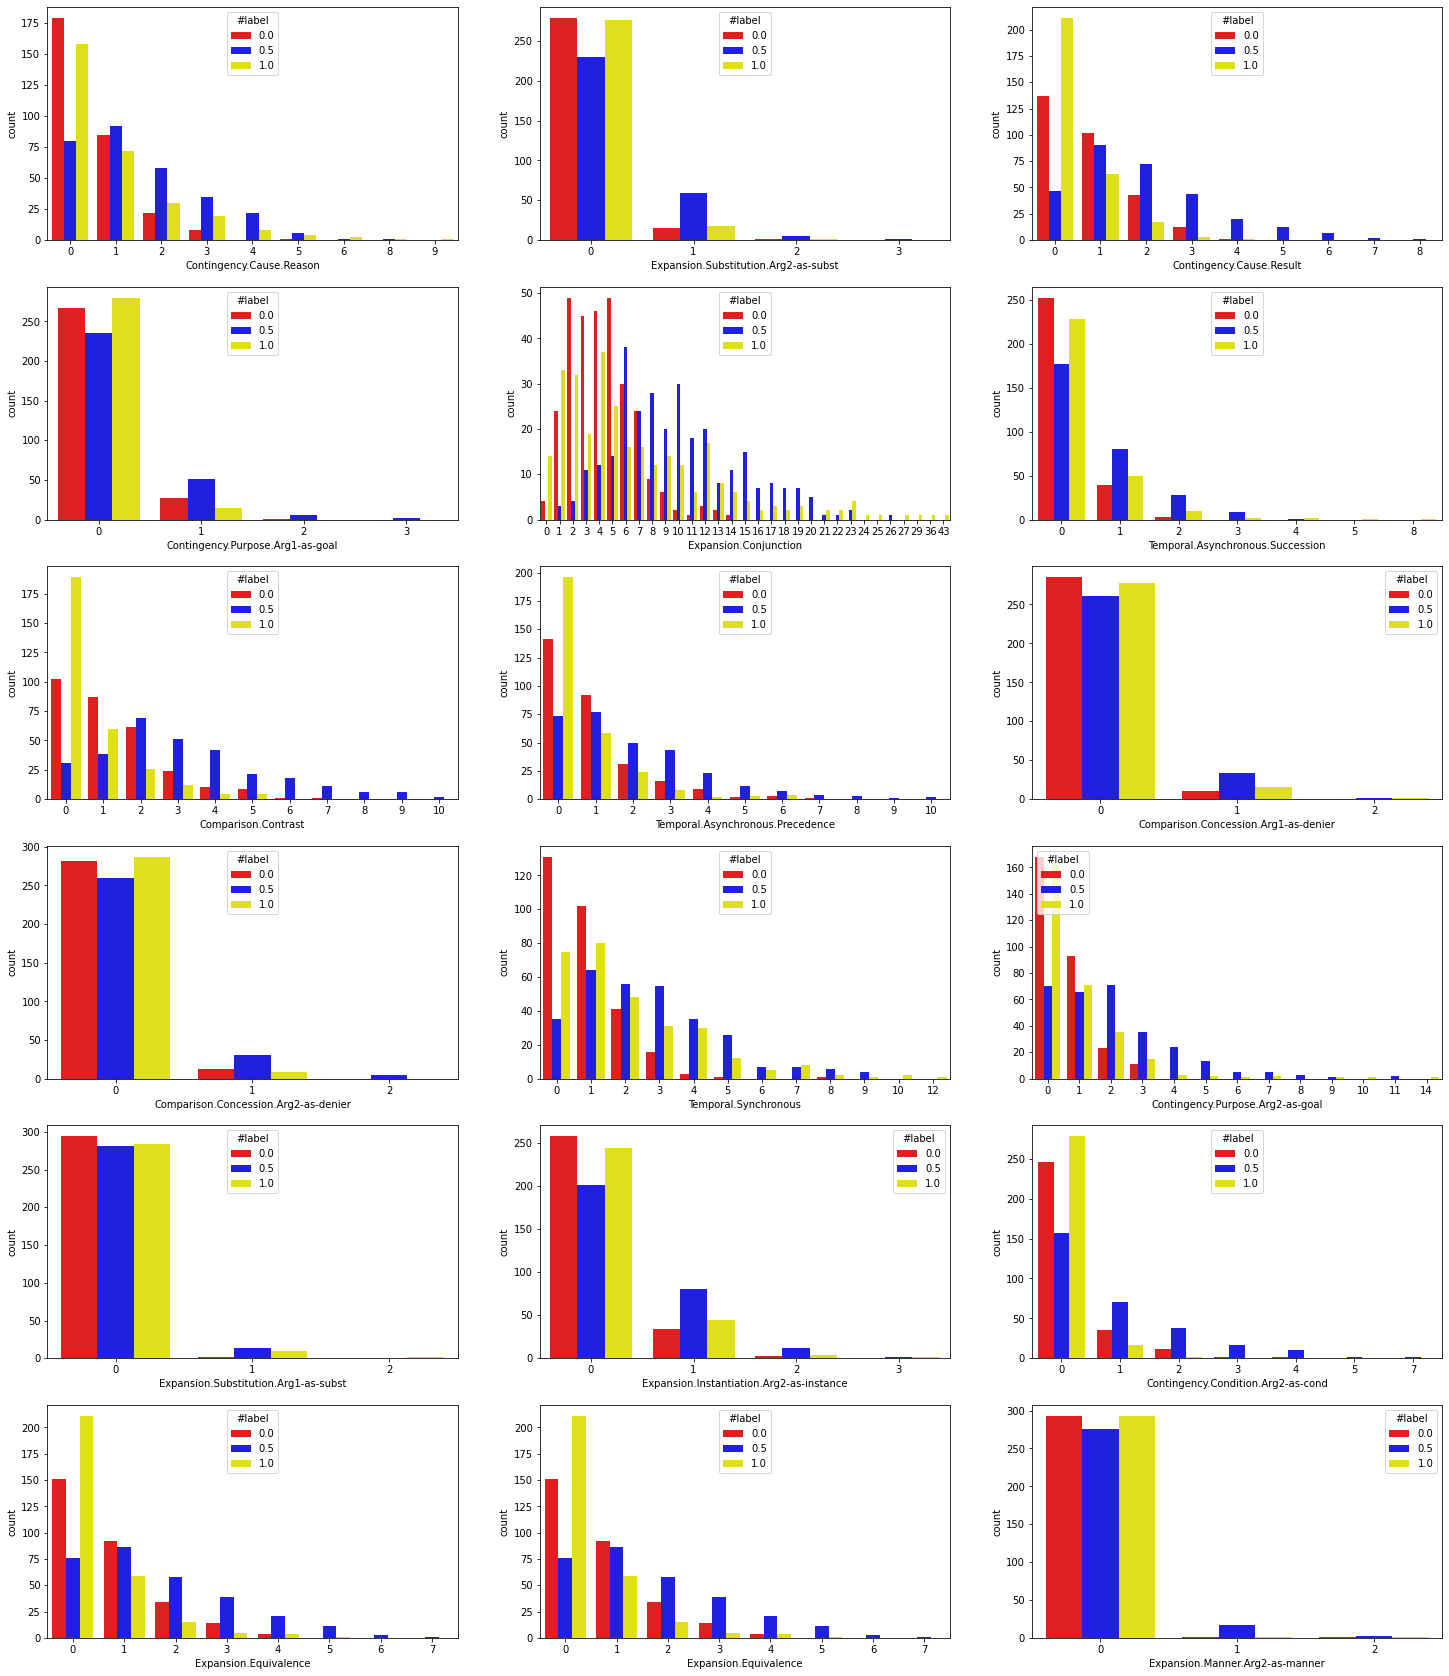

In [41]:
fig, axes = plt.subplots(nrows=6, ncols = 3, figsize=(25, 30))
sns.countplot(ax=axes[0, 0], data=filtered_dms_df, x="Contingency.Cause.Reason", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[0, 1], data=filtered_dms_df, x="Expansion.Substitution.Arg2-as-subst", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[0, 2], data=filtered_dms_df, x="Contingency.Cause.Result", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[1, 0], data=filtered_dms_df, x="Contingency.Purpose.Arg1-as-goal", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[1, 1], data=filtered_dms_df, x="Expansion.Conjunction", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[1, 2], data=filtered_dms_df, x="Temporal.Asynchronous.Succession", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[2, 0], data=filtered_dms_df, x="Comparison.Contrast", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[2, 1], data=filtered_dms_df, x="Temporal.Asynchronous.Precedence", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[2, 2], data=filtered_dms_df, x="Comparison.Concession.Arg1-as-denier", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[3, 0], data=filtered_dms_df, x="Comparison.Concession.Arg2-as-denier", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[3, 1], data=filtered_dms_df, x="Temporal.Synchronous", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[3, 2], data=filtered_dms_df, x="Contingency.Purpose.Arg2-as-goal", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[4, 0], data=filtered_dms_df, x="Expansion.Substitution.Arg1-as-subst", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[4, 1], data=filtered_dms_df, x="Expansion.Instantiation.Arg2-as-instance", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[4, 2], data=filtered_dms_df, x="Contingency.Condition.Arg2-as-cond", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[5, 0], data=filtered_dms_df, x="Expansion.Equivalence", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[5, 1], data=filtered_dms_df, x="Expansion.Equivalence", hue="#label", palette=["red", "blue", "yellow"])
sns.countplot(ax=axes[5, 2], data=filtered_dms_df, x="Expansion.Manner.Arg2-as-manner", hue="#label", palette=["red", "blue", "yellow"])